In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
from google.colab import drive, files
drive.mount('/content/drive')
rootpath = '/content/drive/Shareddrives/KW phase1 repo'
import sys
sys.path.append(rootpath+'/package')
import pandas as pd
from tabulate import tabulate

Mounted at /content/drive


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


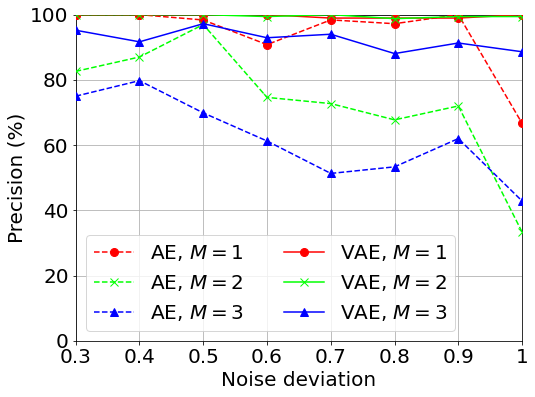

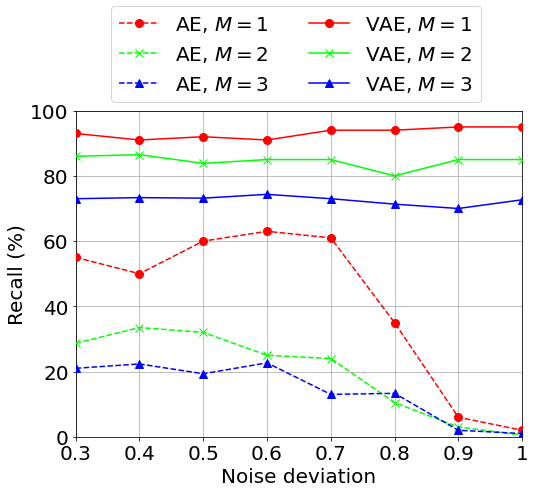

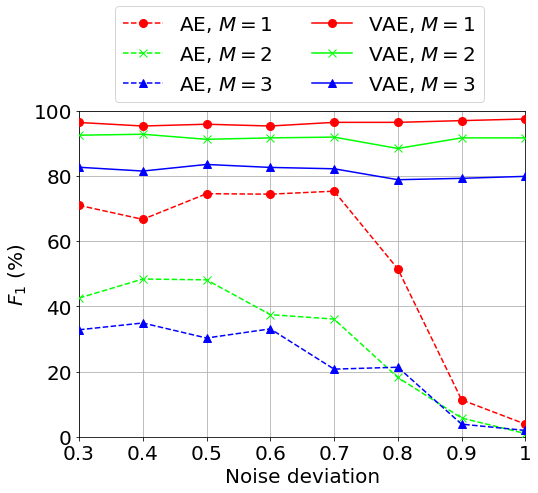

In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

picks = [1, 2, 3]

AEData = {}
VAEData = {}

filePath = rootpath+"/datas/anomalySDPResult/done0804_500-1000"
keys = ['Precision','Recall','F1Score']
yLabels = {'Precision': 'Precision (%)','Recall': 'Recall (%)','F1Score': r'$F_1$ (%)'}
ranges = np.arange(0.2,1,0.1)

# print(ranges)

with open(filePath+'/result0722_AE_V2.csv', 'r',encoding='UTF-8-sig') as f_AE:
  readRows_AE = list (csv.reader(f_AE))
  i=0
  for key in keys:
    AEData[key] = []
    for iter in ranges:
      AEData[key].append([float(x) for x in readRows_AE[i]])
      i+=1

with open(filePath+'/result0722_VAE_V2.csv', 'r', encoding='UTF-8-sig') as f_VAE:
  readRows_VAE = list (csv.reader(f_VAE))
  i=0
  for key in keys:
    VAEData[key] = []
    for iter in ranges:
      VAEData[key].append([float(x) for x in readRows_VAE[i]])
      i+=1

datas = {"AE": AEData, "VAE": VAEData}
datasT = datas.copy()
for idata, data in datas.items():
  for k,v in data.items():
    datasT[idata][k] = np.array(v).T.tolist()

# print(datasT)

labels = []
plotMarkers = ['', 'o','x','^']
lineStyle = {"AE": "--", "VAE": "-"}
colors = ["","#FF0000FF","#00FF00FF","#0000FFFF","#FFFF00FF"]
picks = [1, 2, 3]

for key in keys:
  fig, ax1 = plt.subplots(figsize = (8,6))
  ax1.grid()

  # print(key)
  for idata, data in datasT.items():
    # print(idata)
    for ipick, pick in enumerate(picks):
      # print(len(data[key][ipick]), data[key][ipick])
      x = np.arange(0,len(ranges),1)
      ax1.plot(x, data[key][ipick][::-1], label=idata+r", $M=${}".format(pick), zorder=3, linestyle=lineStyle[idata], color=colors[pick], marker=plotMarkers[pick], markersize=8)
  if key == 'Precision':
    legendLoc = 'lower left'
    ax1.legend(loc=legendLoc, prop={'size': 20}, ncol=2)
  else:
    ax1.legend(bbox_to_anchor=(0.93, 1.35), prop={'size': 20}, ncol=2)
  
  ax1.set_ylim([0,100])
  ax1.set_xlim([0.3,1])
  ax1.set_xlabel('Noise deviation', fontsize=20)
  ax1.set_ylabel(yLabels[key], fontsize=20)
  plt.yticks(fontsize=20)
  plt.xticks(x, ["0.3","0.4","0.5","0.6","0.7","0.8","0.9","1"], fontsize=20)
  plt.savefig('anomaly_detection_comparison_AE_VAE_{}.eps'.format(key),bbox_inches='tight')
  # files.download('anomaly_detection_comparison_AE_VAE_{}.eps'.format(key))

In [17]:
keys = ['Precision','Recall','F1Score']
for key in keys:
  files.download('anomaly_detection_comparison_AE_VAE_{}.eps'.format(key))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>